# Importing Necessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import missingno as msno
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [4]:
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

In [5]:
plt.rc('font', size=15)

# Importing the Input Dataset

In [6]:
thyroid_data = pd.read_csv('input/thyroid0387.data', header=None)

# Data Inspection and Cleaning

In [7]:
thyroid_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9168,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9169,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9170,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [8]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9172 non-null   int64 
 1   1       9172 non-null   object
 2   2       9172 non-null   object
 3   3       9172 non-null   object
 4   4       9172 non-null   object
 5   5       9172 non-null   object
 6   6       9172 non-null   object
 7   7       9172 non-null   object
 8   8       9172 non-null   object
 9   9       9172 non-null   object
 10  10      9172 non-null   object
 11  11      9172 non-null   object
 12  12      9172 non-null   object
 13  13      9172 non-null   object
 14  14      9172 non-null   object
 15  15      9172 non-null   object
 16  16      9172 non-null   object
 17  17      9172 non-null   object
 18  18      9172 non-null   object
 19  19      9172 non-null   object
 20  20      9172 non-null   object
 21  21      9172 non-null   object
 22  22      9172 non-null   

In [7]:
#Name of the Variables in order, gathered from the Raw Data
feature_list = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral source', 'Diagnoses']
len(feature_list)

30

In [8]:
thyroid_data.columns = feature_list
thyroid_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral source,Diagnoses
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]


#### Remvoing useless variables

In [9]:
thyroid_data.drop(columns=['referral source', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], inplace=True)

#### Removing variables which are vague and without context

In [10]:
thyroid_data.drop(columns=['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid'], inplace=True)

Missing values are denoted by '?', so we will replace it with np.nan to them

In [11]:
thyroid_data = thyroid_data.apply(lambda x: np.where(x=='?', np.nan, x))
thyroid_data.head()

,age,sex,sick,pregnant,thyroid_surgery,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,Diagnoses
0,29.0,F,f,f,f,f,f,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,-[840801013]
1,29.0,F,f,f,f,f,f,f,f,f,1.6,1.9,128,NaN,NaN,NaN,-[840801014]
2,41.0,F,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,11,-[840801042]
3,36.0,F,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,26,-[840803046]
4,32.0,F,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36,S[840803047]


### Type Conversion
Converting Data Type of Numerical Variables to float

In [12]:
num_vars = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [13]:
thyroid_data[num_vars] = thyroid_data[num_vars].apply(lambda x: x.astype('float64'))

### Encoding Categorical Variables
Encoding 't' -  True and 'f' - False

In [14]:
cat_vars = ['sex', 'sick', 'pregnant', 'thyroid_surgery', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych']

In [15]:
thyroid_data[cat_vars] = thyroid_data[cat_vars].apply(lambda x: np.where(x=='t', True, np.where(x=='f', False, x)))
thyroid_data[cat_vars].head()

,sex,sick,pregnant,thyroid_surgery,lithium,goitre,tumor,hypopituitary,psych
0,F,False,False,False,False,False,False,False,False
1,F,False,False,False,False,False,False,False,False
2,F,False,False,False,False,False,False,False,False
3,F,False,False,False,False,False,False,False,False
4,F,False,False,False,False,False,False,False,False


### Derive Variable Creation

In [16]:
# Creating a Dictionary about Diagnoses Variable from the information given in the Raw Data
diagnoses_dict = {
    'hyperthyroid':['A', 'B', 'C', 'D'],
    'hypothyroid':['E', 'F', 'G', 'H'],
    'normal':['-']
}

In [17]:
temp_list = []
for i in range(thyroid_data.shape[0]):
    if thyroid_data.Diagnoses[i][0] in diagnoses_dict['hyperthyroid']:
        temp_list.append('hyperthyroid')
    elif thyroid_data.Diagnoses[i][0] in diagnoses_dict['hypothyroid']:
        temp_list.append('hypothyroid')
    elif thyroid_data.Diagnoses[i][0] in diagnoses_dict['normal']:
        temp_list.append('normal')
    else:
        temp_list.append('others')
        
thyroid_data['condition'] = temp_list

In [18]:
# Dropping Diagnoses as it is not needed anymore
thyroid_data.drop(columns=['Diagnoses'], inplace=True)

In [19]:
thyroid_data.condition.value_counts()

normal          6771
others          1493
hypothyroid      667
hyperthyroid     241
Name: condition, dtype: int64

Deriving the Dependent Variable

In [20]:
thyroid_data['thyroid_disease'] = np.where((thyroid_data.condition == 'hypothyroid')|(thyroid_data.condition == 'hyperthyroid'), True, False)

In [21]:
thyroid_data.thyroid_disease.value_counts()

False    8264
True      908
Name: thyroid_disease, dtype: int64

### Duplicate Value Inspection

In [22]:
thyroid_data.duplicated().sum()

15

In [23]:
# Dropping the Duplicate Observations
thyroid_data.drop_duplicates(ignore_index=True, inplace=True)

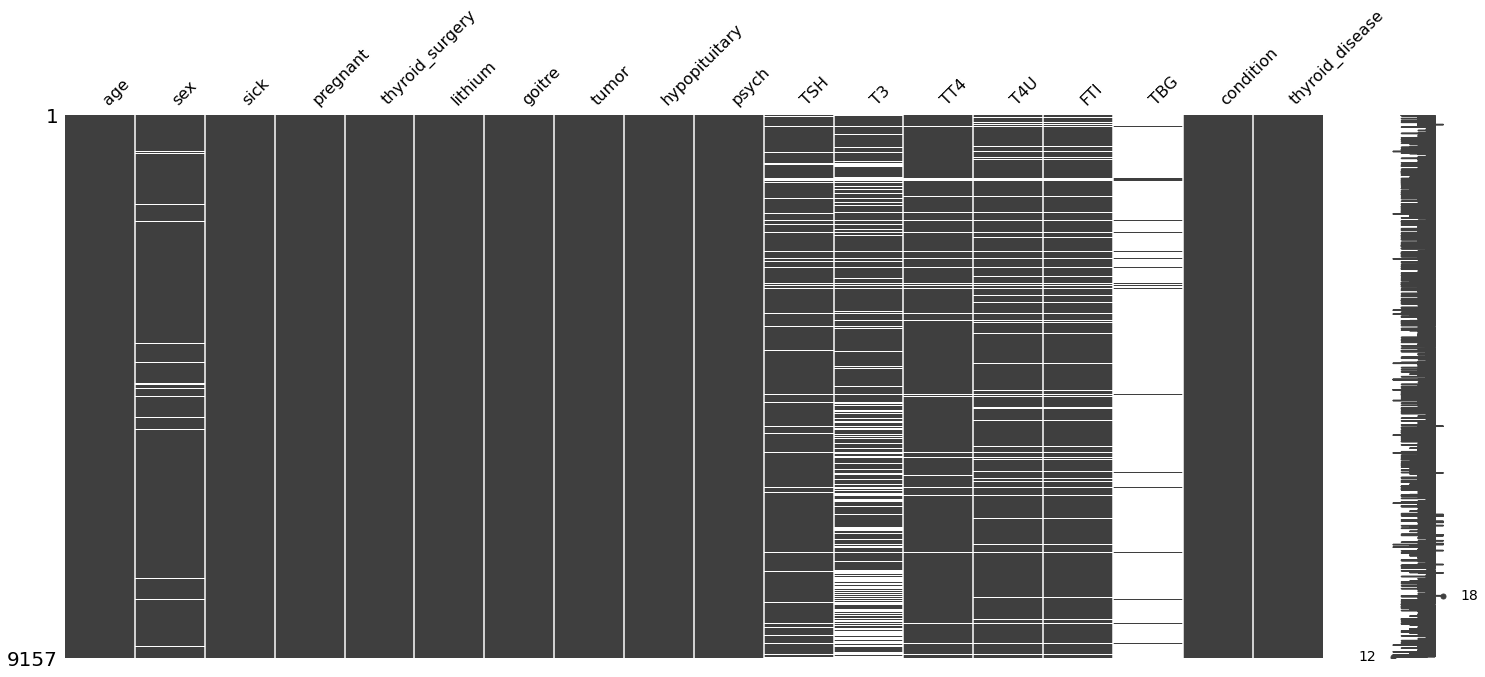

In [44]:
msno.matrix(thyroid_data)
plt.savefig('plots/missing_value_matrix.png', bbox_inches='tight')
plt.show()

In [45]:
thyroid_data.isna().sum()

age                   0
sex                 306
sick                  0
pregnant              0
thyroid_surgery       0
lithium               0
goitre                0
tumor                 0
hypopituitary         0
psych                 0
TSH                 830
T3                 2593
TT4                 430
T4U                 796
FTI                 789
TBG                8819
condition             0
thyroid_disease       0
dtype: int64

Dropping TBG due to High amount of Missing Values

In [24]:
thyroid_data.drop(columns=['TBG'], inplace=True)

Now, Dropping all the observations which have missing values in more than 2 out of 5 Numerical Variables

In [25]:
num_vars = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
index_to_drop = [i for i, value in enumerate(thyroid_data[num_vars].isna().sum(axis=1).values) if value > 2]
print('No. of observations to be dropped :',len(index_to_drop))

No. of observations to be dropped : 454


In [26]:
thyroid_data = thyroid_data.drop(index=index_to_drop).reset_index(drop=True)
thyroid_data

,age,sex,sick,pregnant,thyroid_surgery,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,condition,thyroid_disease
0,29.0,F,False,False,False,False,False,False,False,False,1.6,1.9,128.0,NaN,NaN,normal,False
1,28.0,F,False,False,False,False,False,False,False,False,0.7,2.6,116.0,NaN,NaN,normal,False
2,28.0,F,False,False,False,False,False,False,False,False,1.2,1.8,76.0,NaN,NaN,normal,False
3,28.0,F,False,False,False,False,False,False,False,False,1.9,1.7,83.0,NaN,NaN,normal,False
4,54.0,F,False,False,False,False,False,False,False,False,1.9,2.3,133.0,NaN,NaN,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,56.0,M,False,False,False,False,False,False,False,False,NaN,NaN,64.0,0.83,77.0,normal,False
8699,22.0,M,False,False,False,False,False,False,False,False,NaN,NaN,91.0,0.92,99.0,normal,False
8700,69.0,M,False,False,False,False,False,False,False,False,NaN,NaN,113.0,1.27,89.0,others,False
8701,47.0,F,False,False,False,False,False,False,False,False,NaN,NaN,75.0,0.85,88.0,normal,False


### Separating Features and Target Variable

In [27]:
X = thyroid_data[thyroid_data.columns.difference(['condition', 'thyroid_disease'])]
y = thyroid_data['thyroid_disease']
print('Thyroid Data : {}\nFeatures :{}\nTarget : {}'.format(thyroid_data.shape, X.shape, y.shape))

Thyroid Data : (8703, 17)
Features :(8703, 15)
Target : (8703,)


In [28]:
cat_vars = [var for var in X.columns if var not in num_vars]
binary_vars = [var for var in cat_vars if var != 'sex']
print('Numerical Variables : {} \nLength : {}'.format(num_vars, len(num_vars)))
print('Categorical Variables : {} \nLength : {}'.format(cat_vars, len(cat_vars)))
print('Binary Variables : {} \nLength : {}'.format(binary_vars, len(binary_vars)))

Numerical Variables : ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'] 
Length : 6
Categorical Variables : ['goitre', 'hypopituitary', 'lithium', 'pregnant', 'psych', 'sex', 'sick', 'thyroid_surgery', 'tumor'] 
Length : 9
Binary Variables : ['goitre', 'hypopituitary', 'lithium', 'pregnant', 'psych', 'sick', 'thyroid_surgery', 'tumor'] 
Length : 8


# Exploratory Data Analysis

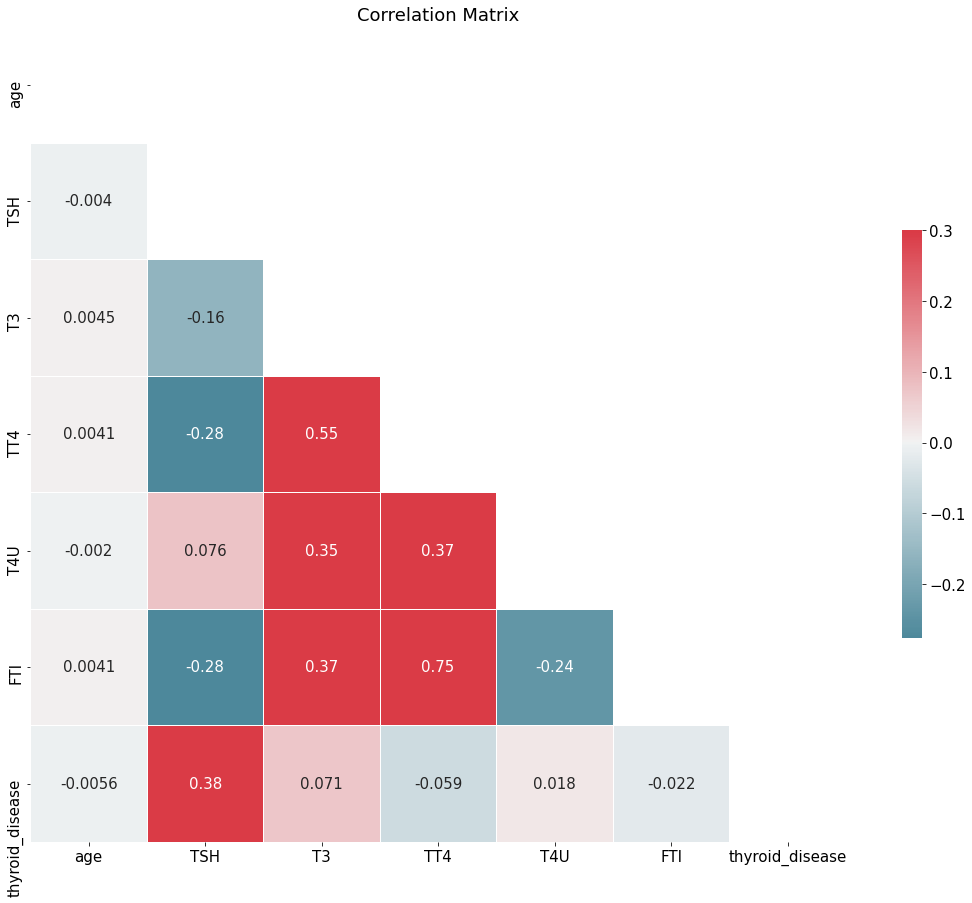

In [60]:
corr_matrix = thyroid_data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix')

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [52]:
thyroid_data[num_vars].iloc[:,1]

0       0.3
1       1.6
2       NaN
3       NaN
4       NaN
       ... 
9167    NaN
9168    NaN
9169    NaN
9170    NaN
9171    NaN
Name: TSH, Length: 9172, dtype: float64

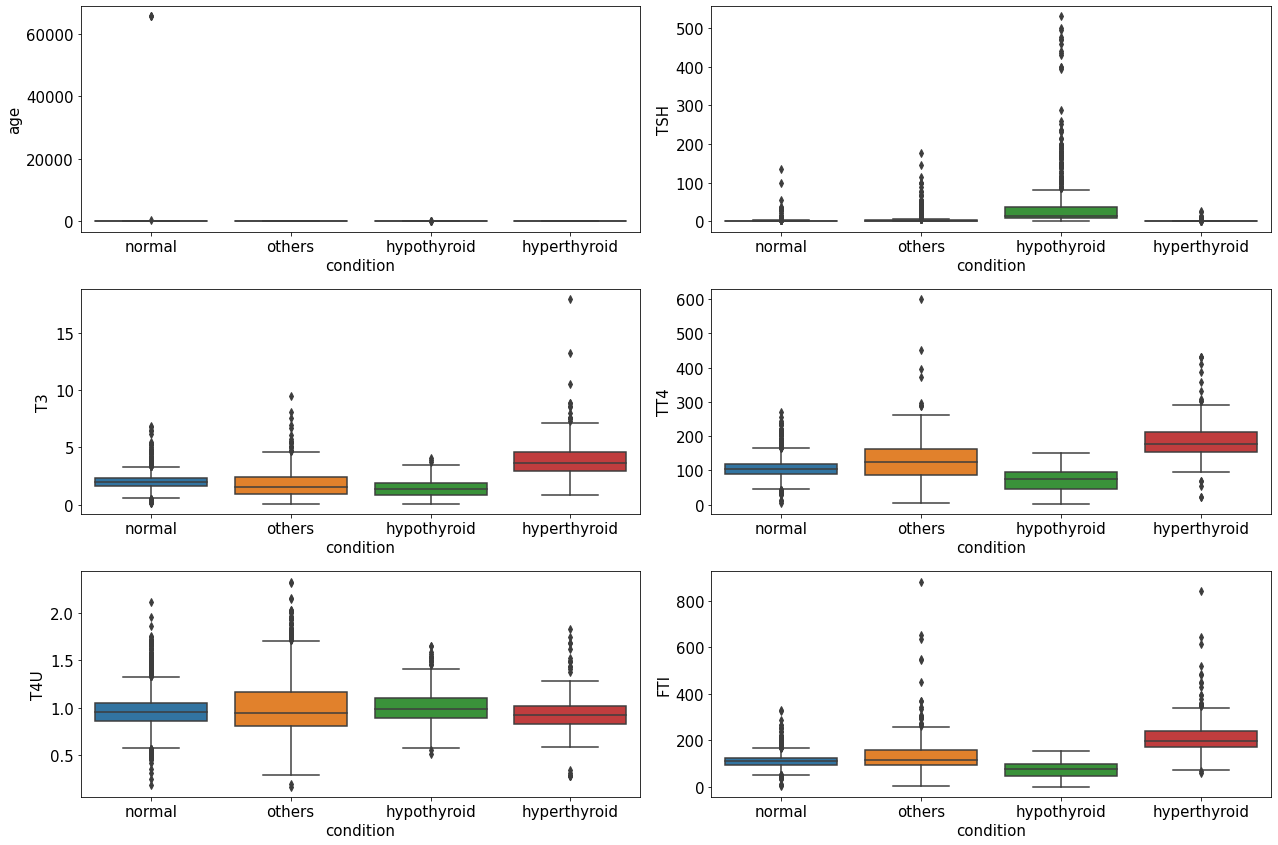

In [71]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.boxplot(data=thyroid_data, x='condition', y=thyroid_data[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

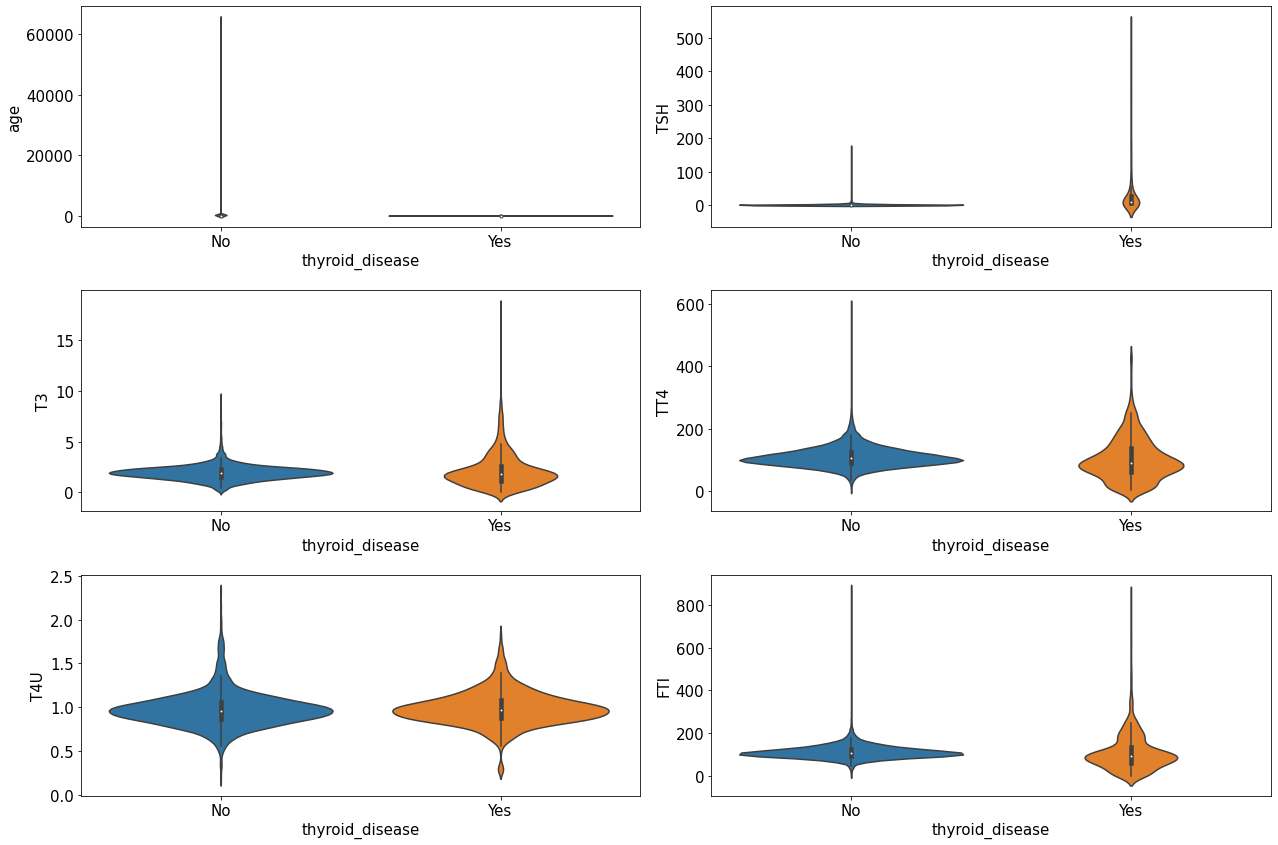

In [82]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.violinplot(data=thyroid_data, x='thyroid_disease', y=thyroid_data[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

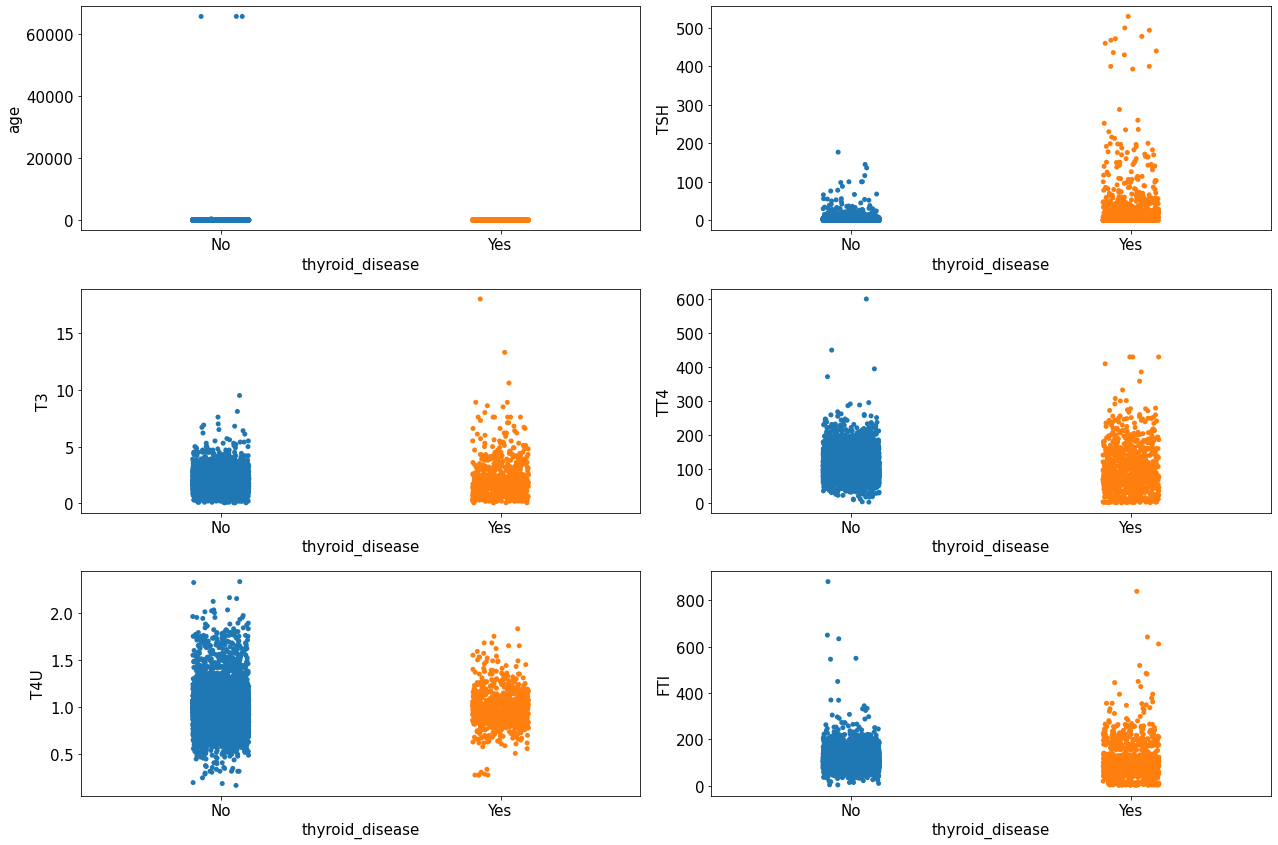

In [83]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.stripplot(data=thyroid_data, x='thyroid_disease', y=thyroid_data[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

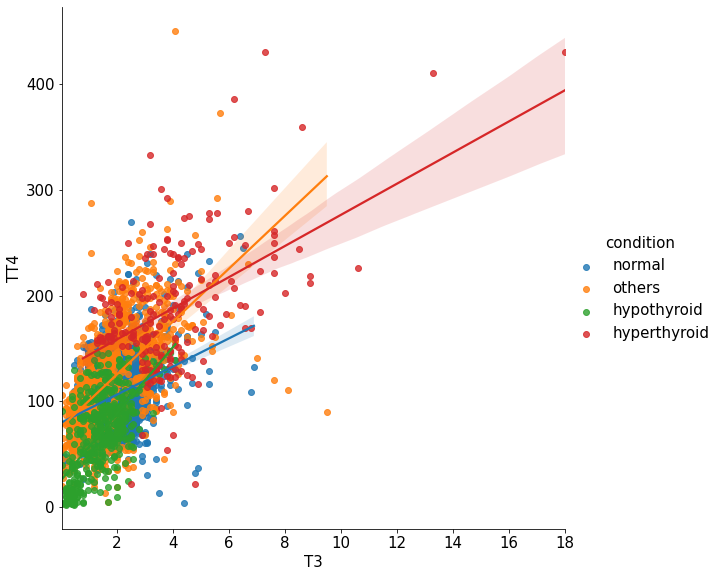

In [77]:
sns.lmplot(data=thyroid_data, x='T3', y='TT4', hue='condition', height=8)

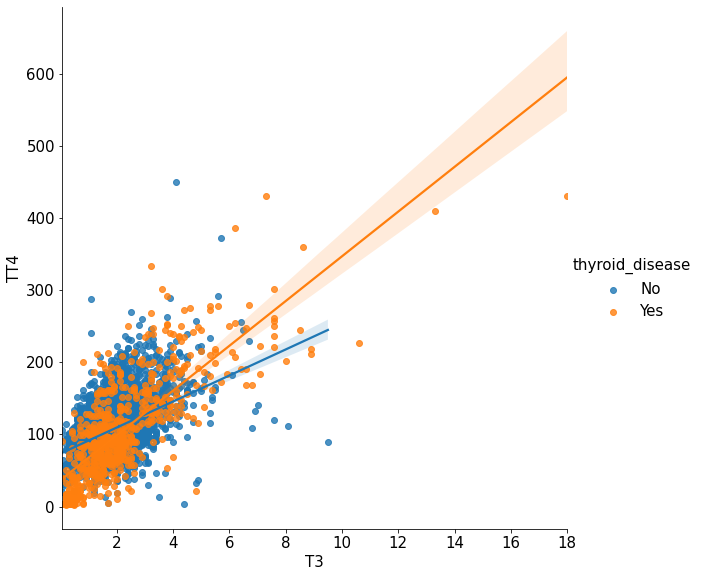

In [73]:
sns.lmplot(data=thyroid_data, x='T3', y='TT4', hue='thyroid_disease', height=8)

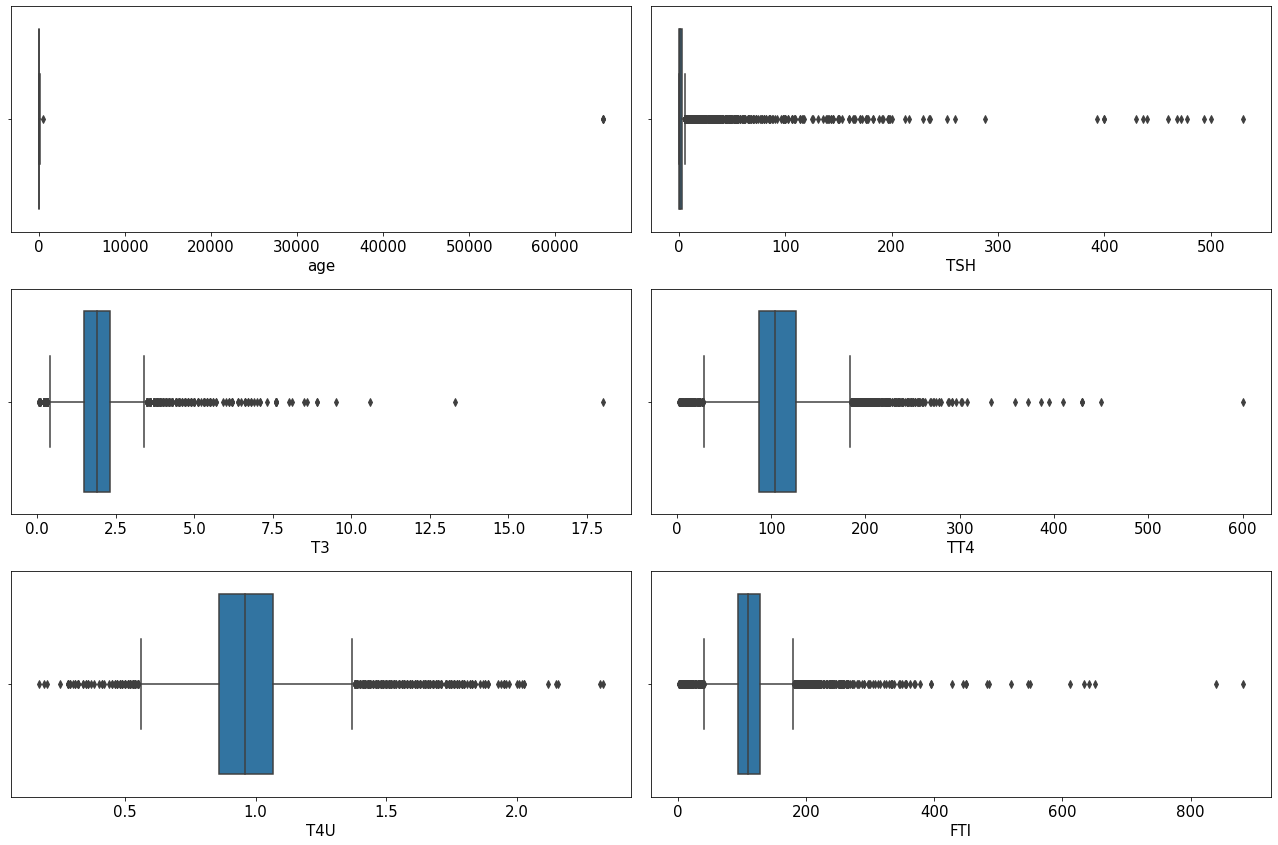

In [105]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.boxplot(X[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

Thyroid disease can affect anyone — men, women, infants, teenagers and the elderly. It can be present at birth (typically hypothyroidism) and it can develop as you age (often after menopause in women).
source - [https://my.clevelandclinic.org/](https://my.clevelandclinic.org/health/diseases/8541-thyroid-disease#:~:text=Thyroid%20disease%20can%20affect%20anyone,often%20after%20menopause%20in%20women)

# Data Pre-Processing

## Separating Training and Testing Datasets

In [30]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=12345)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(6092, 15)
(2611, 15)
(6092,)
(2611,)


## Outlier Treatment

Clipping the age variable at 1st & 99th permilles and all the other variables at 1st and 99th percentile

In [31]:
outliers_ucap = {}
outliers_lcap = {}
for num_var in num_vars:
    if num_var == 'age':
        outliers_lcap[num_var] = round(train_x[num_var].dropna().quantile(0.001),2)
        outliers_ucap[num_var] = round(train_x[num_var].dropna().quantile(0.999),2)
    else:
        outliers_lcap[num_var] = round(train_x[num_var].dropna().quantile(0.01),2)
        outliers_ucap[num_var] = round(train_x[num_var].dropna().quantile(0.99),2)
print('Lower Cap :',outliers_lcap)
print('Upper Cap :',outliers_ucap)

Lower Cap : {'age': 1.0, 'TSH': 0.02, 'T3': 0.3, 'TT4': 14.87, 'T4U': 0.55, 'FTI': 15.0}
Upper Cap : {'age': 96.82, 'TSH': 98.0, 'T3': 5.04, 'TT4': 230.0, 'T4U': 1.69, 'FTI': 251.0}


Dumping the information about treating outliers into pickle files

In [38]:
# For outliers_lcap
# create a binary pickle file 
f1 = open("object instances/outliers_lcap.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(outliers_lcap,f1)

# close file
f1.close()

# For outliers_ucap
f2 = open("object instances/outliers_ucap.pkl","wb")
pickle.dump(outliers_ucap,f2)
f2.close()

In [32]:
# For Training Data
for num_var in num_vars:
    if num_var == 'age':
        train_x[num_var] = train_x[num_var].clip(lower=train_x[num_var].dropna().quantile(0.001), upper=train_x[num_var].dropna().quantile(0.999))
    else:
        train_x[num_var] = train_x[num_var].clip(lower=train_x[num_var].dropna().quantile(0.01), upper=train_x[num_var].dropna().quantile(0.99))

In [33]:
# For Testing Data
for num_var in num_vars:
    test_x[num_var] = test_x[num_var].clip(lower= outliers_lcap[num_var], upper=outliers_ucap[num_var])

## Missing Values Treatment

In [54]:
train_x.isna().sum()

FTI                 237
T3                 1527
T4U                 241
TBG                6062
TSH                 307
TT4                   4
age                   0
goitre                0
hypopituitary         0
lithium               0
pregnant              0
psych                 0
sex                 202
sick                  0
thyroid_surgery       0
tumor                 0
dtype: int64

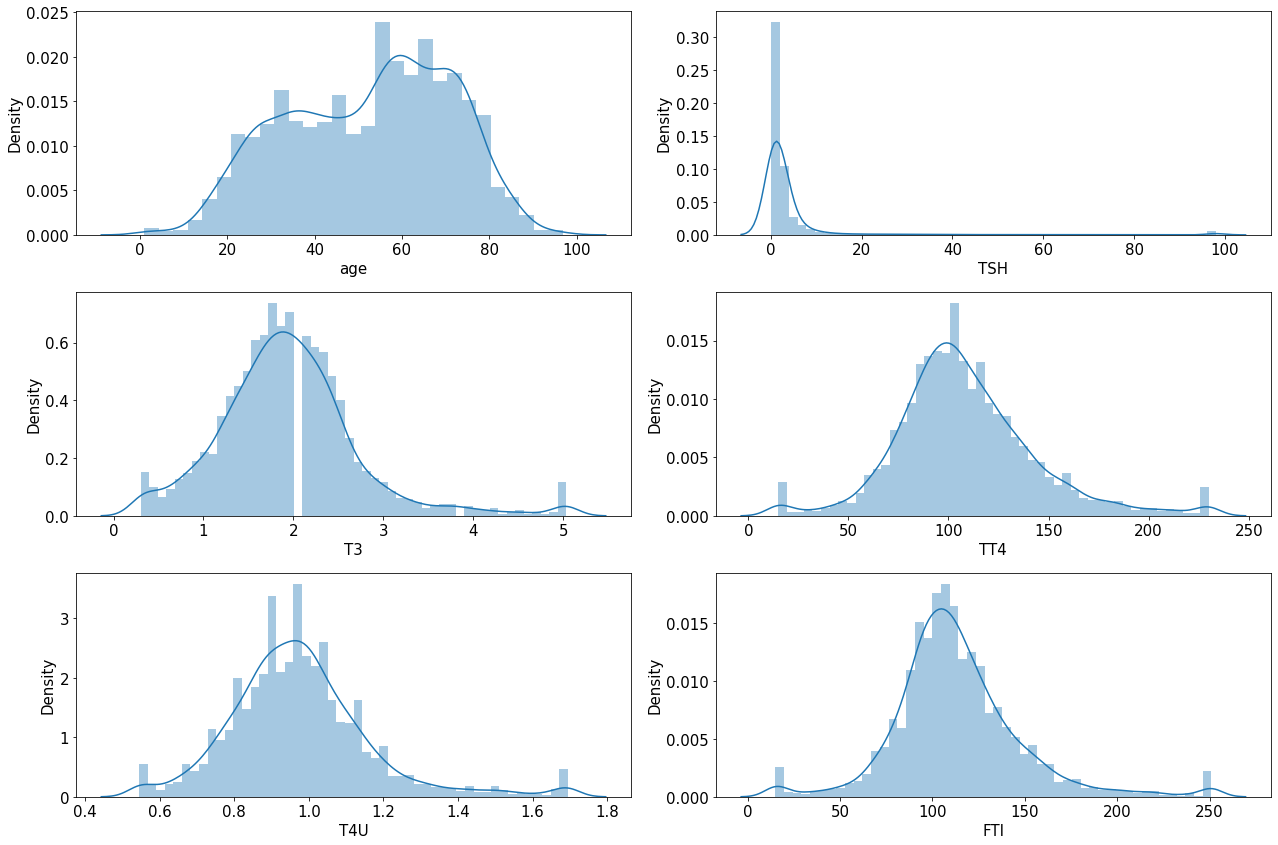

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.distplot(train_x[num_vars].iloc[:,i], kde=True, ax=ax[i])
plt.tight_layout()
plt.savefig('plots/Distribution Plots for Numerical Data.png', bbox_inches = 'tight')
plt.show()

All the Numerical Variables seems to be normally distributed except TSH, so we will impute TSH with median and all others with mean whereas, There is only one Categorical Variable i.e. 'sex', so we will impute it with mode.

In [34]:
num_vars

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [35]:
missing_imputation = {}
for num_var in train_x.columns:
    if num_var in ['age', 'T3', 'TT4', 'T4U', 'FTI']:
        missing_imputation[num_var] = round(train_x[num_var].dropna().mean(),2)
    elif num_var == 'TSH':
        missing_imputation[num_var] = round(train_x[num_var].dropna().median(),2)
    elif num_var == 'sex':
        missing_imputation[num_var] = train_x[num_var].dropna().mode()[0]
    else:
        continue
print(missing_imputation)

{'FTI': 113.08, 'T3': 1.94, 'T4U': 0.97, 'TSH': 1.4, 'TT4': 108.38, 'age': 52.46, 'sex': 'F'}


In [45]:
# Dumping the information about Missing Value Imputation into a pickle file
f = open("object instances/missing_imputation.pkl","wb")
pickle.dump(missing_imputation,f)
f.close()

In [36]:
for num_var in train_x.columns:
    if num_var in missing_imputation.keys():
        train_x[num_var] = train_x[num_var].fillna(missing_imputation[num_var])
        test_x[num_var] = test_x[num_var].fillna(missing_imputation[num_var])
    else:
        continue
if train_x.isna().sum().sum() == 0:
    print('Missing Value Imputation on Training Data is Done')
if test_x.isna().sum().sum() == 0:
    print('Missing Value Imputation on Testing Data is Done')

Missing Value Imputation on Training Data is Done
Missing Value Imputation on Testing Data is Done


## Encoing the Categorical Variables

In [37]:
# For 'Sex' Variable : 'M' - 1 and 'F' - 0
train_x.sex = train_x.sex.map({'M':1, 'F':0})
test_x.sex = test_x.sex.map({'M':1, 'F':0})

In [38]:
# For all the other Variables : 'True' - 1 and 'False' - 0
train_x[cat_vars] = train_x[cat_vars].apply(lambda x: np.where(x==True, 1, 0))
test_x[cat_vars] = test_x[cat_vars].apply(lambda x: np.where(x==True, 1, 0))
train_x.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
8547,90.0,1.94,0.63,1.20,57.0,75.0,0,0,0,0,0,1,0,0,0
8571,97.0,2.50,0.98,1.10,95.0,65.0,0,0,0,0,1,1,0,0,0
4757,200.0,2.60,1.01,0.02,203.0,42.0,0,0,0,0,0,0,0,0,0
6323,156.0,0.40,0.68,4.30,106.0,81.0,0,0,0,0,0,0,0,0,0
1412,82.0,1.94,0.82,16.00,67.0,58.0,0,0,0,0,0,0,0,0,0


## Standardization

In [39]:
scaler = StandardScaler()

In [40]:
scaler = ColumnTransformer([('scaler', StandardScaler(), ['FTI', 'T3', 'T4U', 'TSH', 'TT4', 'age'])], remainder='passthrough')

In [41]:
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
train_x_scaled.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
0,-0.675459,0.000310,-1.840230,-0.237613,-1.463851,1.197936,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.470589,0.825060,0.031386,-0.245930,-0.381304,0.666459,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2.543923,0.972337,0.191810,-0.335756,2.695408,-0.555937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.256170,-2.267751,-1.572856,0.020219,-0.067935,1.516822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.909596,0.000310,-0.824210,0.993326,-1.178970,0.294426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Dumping the scaler into a pickle file
file = open('models/scaler.pkl', 'wb' )

pickle.dump(scaler, file)

file.close()

In [42]:
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=train_x.columns)
test_x_scaled.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
0,0.524492,-0.647707,0.405709,-0.310804,0.843683,-0.130755,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.207185,0.000310,0.512659,-0.304150,0.131481,1.304231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.904965,0.000310,0.405709,-0.220979,1.214028,-1.618890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.231534,0.000310,-0.931159,0.061805,-1.463851,-0.555937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.675459,0.000310,-1.038109,0.244782,-1.065018,1.623117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## OverSampling
### using RandomOverSampler from imblearning

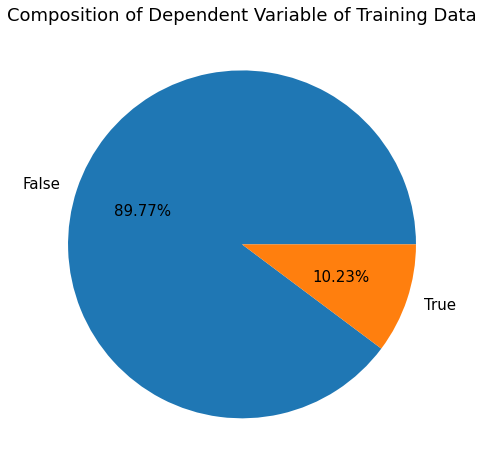

In [50]:
plt.figure(figsize=(8,8))
plt.pie(train_y.value_counts(), autopct='%.2f%%', labels=train_y.value_counts().index)
plt.title('Composition of Dependent Variable of Training Data')
plt.savefig('plots/Piechart_train_y.png', bboxes_inches='tight')
plt.show()

In [51]:
train_y.value_counts()

False    5469
True      623
Name: thyroid_disease, dtype: int64

Classes are Highly Imbalanced, so we will use RandomOverSampler to OverSample the Class with low proportion

In [52]:
oversampler = RandomOverSampler(random_state=12345)
train_x_os, train_y_os = oversampler.fit_resample(train_x, train_y)
train_y_os.value_counts()

False    5469
True     5469
Name: thyroid_disease, dtype: int64

The Classes are Balanced Now, so we can move on to Modelling

# Data Modelling

## Logistic Regression

In [53]:
log_reg = LogisticRegression(random_state=12345)

log_reg.fit(train_x_os, train_y_os)

LogisticRegression(random_state=12345)

In [94]:
# Dumping the log_reg model into a pickle file
file = open('models/LogisticRegression.pkl', 'wb' )

pickle.dump(rf_clf2, file)

file.close()

In [156]:
# Creating a Dataframe to save all the Predictions
train_predictions_df = pd.DataFrame({'log_reg_pred': log_reg.predict(train_x_os), 'log_reg_proba': log_reg.predict_proba(train_x_os)[:,1]})
test_predictions_df = pd.DataFrame({'log_reg_pred': log_reg.predict(test_x_scaled), 'log_reg_proba': log_reg.predict_proba(test_x_scaled)[:,1]})

In [55]:
logreg_train_acc = accuracy_score(train_y_os, train_predictions_df.log_reg_pred)
logreg_test_acc = accuracy_score(test_y, test_predictions_df.log_reg_pred)
logreg_train_auc = roc_auc_score(train_y_os, train_predictions_df.log_reg_proba)
logreg_test_auc = roc_auc_score(test_y, test_predictions_df.log_reg_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(logreg_train_acc, logreg_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(logreg_train_auc, logreg_test_auc ))

Training Accuracy :0.8880051197659535 | Testing Accuracy :0.871313672922252
Training AUC :0.9470374100454362 | Testing AUC :0.5759391734584206


In [56]:
target_names = ['False', 'True']

In [85]:
print(classification_report(test_y, test_predictions_df.log_reg_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.90      0.96      0.93      2338
        True       0.22      0.09      0.12       273

    accuracy                           0.87      2611
   macro avg       0.56      0.53      0.53      2611
weighted avg       0.83      0.87      0.85      2611



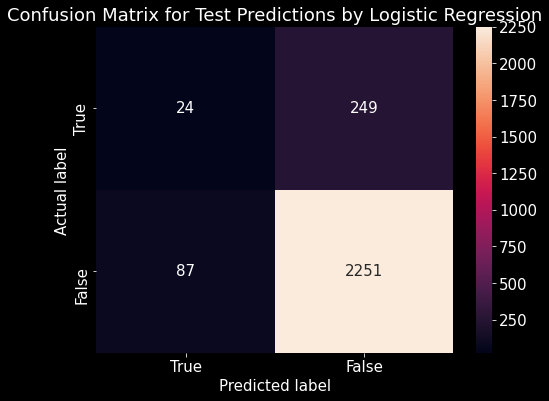

In [108]:
cm_log_reg = confusion_matrix(test_y, test_predictions_df.log_reg_pred, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_log_reg, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by Logistic Regression')
    plt.savefig('plots/Confusion Matrix - Logistic Regression.png', bbox_inches='tight')
    plt.show()

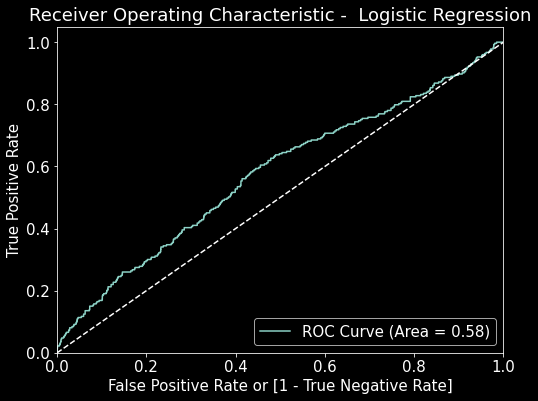

In [109]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.log_reg_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % logreg_test_auc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic -  Logistic Regression')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - Logistic Regression.png', bbox_inches='tight')
    plt.show()

## Support Vector Machine

In [57]:
lsvc = SVC(kernel='linear', gamma='auto', probability=True, random_state=12345)

lsvc.fit(train_x_os, train_y_os)

SVC(gamma='auto', kernel='linear', probability=True, random_state=12345)

In [58]:
# Dumping the lsvc model into a pickle file
file = open('models/LinearSupportVectorMachine.pkl', 'wb' )

pickle.dump(lsvc, file)

file.close()

In [157]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(lsvc.predict(train_x_os), name='lsvc_pred'), pd.Series(lsvc.predict_proba(train_x_os)[:,1], name='lsvc_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(lsvc.predict(test_x_scaled), name='lsvc_pred'), pd.Series(lsvc.predict_proba(test_x_scaled)[:,1],name='lsvc_proba')], axis=1)

In [60]:
lsvc_train_acc = accuracy_score(train_y_os, train_predictions_df.lsvc_pred)
lsvc_test_acc = accuracy_score(test_y, test_predictions_df.lsvc_pred)
lsvc_train_auc = roc_auc_score(train_y_os, train_predictions_df.lsvc_proba)
lsvc_test_auc = roc_auc_score(test_y, test_predictions_df.lsvc_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(lsvc_train_acc, lsvc_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(lsvc_train_auc, lsvc_test_auc ))

Training Accuracy :0.8993417443773999 | Testing Accuracy :0.895059364228265
Training AUC :0.9506724198002131 | Testing AUC :0.670719784919956


In [61]:
print(classification_report(test_y, test_predictions_df.lsvc_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.90      1.00      0.94      2338
        True       0.44      0.01      0.03       273

    accuracy                           0.90      2611
   macro avg       0.67      0.51      0.49      2611
weighted avg       0.85      0.90      0.85      2611



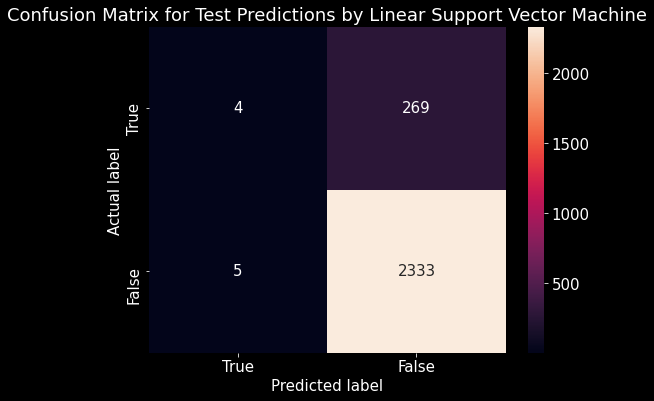

In [62]:
cm_lsvc = confusion_matrix(test_y, test_predictions_df.lsvc_pred, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_lsvc, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by Linear Support Vector Machine')
    plt.savefig('plots/Confusion Matrix - LinearSVC.png', bbox_inches='tight')
    plt.show()

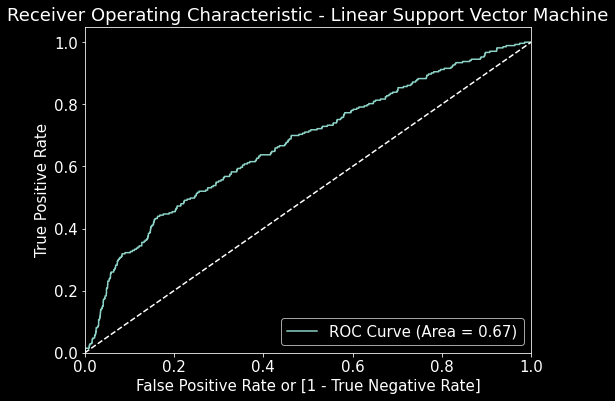

In [63]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.lsvc_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % lsvc_test_auc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Linear Support Vector Machine')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - LinearSVC.png', bbox_inches='tight')
    plt.show()

## Random Forest Classifier

In [64]:
rf_clf = RandomForestClassifier(random_state=12345)

rf_clf.fit(train_x_os, train_y_os)

RandomForestClassifier(random_state=12345)

In [65]:
file  = open('models/RandomForest.pkl', 'wb' )

pickle.dump(rf_clf, file)

file.close()

In [158]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(rf_clf.predict(train_x_os), name='rf_clf_pred'), pd.Series(rf_clf.predict_proba(train_x_os)[:,1], name='rf_clf_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(rf_clf.predict(test_x_scaled), name='rf_clf_pred'), pd.Series(rf_clf.predict_proba(test_x_scaled)[:,1],name='rf_clf_proba')], axis=1)

In [67]:
rf_clf_train_acc = accuracy_score(train_y_os, train_predictions_df.rf_clf_pred)
rf_clf_test_acc = accuracy_score(test_y, test_predictions_df.rf_clf_pred)
rf_clf_train_auc = roc_auc_score(train_y_os, train_predictions_df.rf_clf_proba)
rf_clf_test_auc = roc_auc_score(test_y, test_predictions_df.rf_clf_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(rf_clf_train_acc, rf_clf_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(rf_clf_train_auc, rf_clf_test_auc ))

Training Accuracy :1.0 | Testing Accuracy :0.907698199923401
Training AUC :1.0 | Testing AUC :0.5986245718923221


In [69]:
print(classification_report(test_y, test_predictions_df.rf_clf_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95      2338
        True       0.90      0.13      0.23       273

    accuracy                           0.91      2611
   macro avg       0.90      0.57      0.59      2611
weighted avg       0.91      0.91      0.88      2611



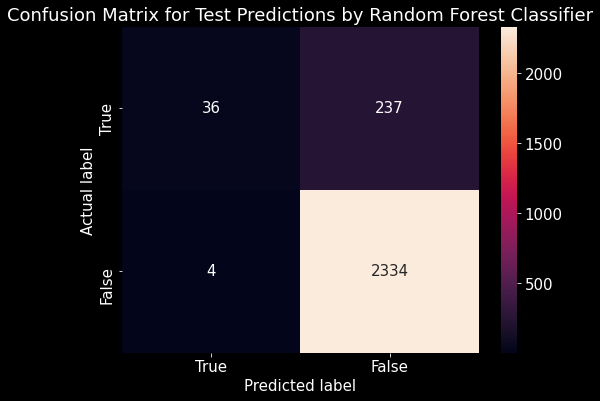

In [70]:
cm_rf_clf = confusion_matrix(test_y, test_predictions_df.rf_clf_pred, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_rf_clf, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by Random Forest Classifier')
    plt.savefig('plots/Confusion Matrix - Random Forest.png', bbox_inches='tight')
    plt.show()

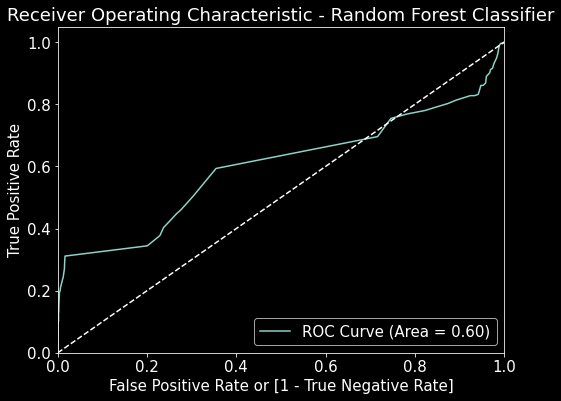

In [71]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.rf_clf_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % rf_clf_test_auc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Random Forest Classifier')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - Random Forest.png', bbox_inches='tight')
    plt.show()

### Tuning Random Forest Classifier
#### Tune Model 1 : For Best Accuracy

In [72]:
rf_params ={
    'n_estimators': [20,50,100,150],
    'max_depth': [5,10,15],
    'max_features': [5,10,15]    
}

In [73]:
rfCV1 = GridSearchCV(RandomForestClassifier(random_state=12345), param_grid=rf_params, cv=5, verbose=10, n_jobs=-1, scoring='accuracy')

rfCV1 .fit(train_x_os, train_y_os)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [5, 10, 15],
                         'n_estimators': [20, 50, 100, 150]},
             scoring='accuracy', verbose=10)

In [76]:
print('Best Score :{} | Best Parameters :{}'.format(rfCV1.best_score_, rfCV1.best_params_))

Best Score :0.9821720336808246 | Best Parameters :{'max_depth': 15, 'max_features': 5, 'n_estimators': 20}


In [77]:
cv_results_rf1 = pd.DataFrame(rfCV1.cv_results_)
cv_results_rf1 = cv_results_rf1.sort_values("mean_test_score", ascending=False)
cv_results_rf1[
    [
        "mean_test_score",
        "std_test_score",
        "param_n_estimators",
        "param_max_depth",
        "param_max_features"
    ]
].head(5)

,mean_test_score,std_test_score,param_n_estimators,param_max_depth,param_max_features
24,0.982172,0.002005,20,15,5
25,0.982081,0.002135,50,15,5
27,0.981989,0.002483,150,15,5
26,0.981715,0.002421,100,15,5
28,0.981075,0.002253,20,15,10


In [78]:
# Using the Best Estimator to Create a New RF Model
rf_clf1 = rfCV1.best_estimator_

rf_clf1.fit(train_x_os, train_y_os)

RandomForestClassifier(max_depth=15, max_features=5, n_estimators=20,
                       random_state=12345)

In [79]:
file  = open('models/RandomForestTuned1.pkl', 'wb' )

pickle.dump(rf_clf1, file)

file.close()

In [159]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(rf_clf1.predict(train_x_os), name='rf_clf1_pred'), pd.Series(rf_clf1.predict_proba(train_x_os)[:,1], name='rf_clf1_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(rf_clf1.predict(test_x_scaled), name='rf_clf1_pred'), pd.Series(rf_clf1.predict_proba(test_x_scaled)[:,1],name='rf_clf1_proba')], axis=1)

In [81]:
rf_clf1_train_acc = accuracy_score(train_y_os, train_predictions_df.rf_clf1_pred)
rf_clf1_test_acc = accuracy_score(test_y, test_predictions_df.rf_clf1_pred)
rf_clf1_train_auc = roc_auc_score(train_y_os, train_predictions_df.rf_clf1_proba)
rf_clf1_test_auc = roc_auc_score(test_y, test_predictions_df.rf_clf1_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(rf_clf1_train_acc, rf_clf1_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(rf_clf1_train_auc, rf_clf1_test_auc ))

Training Accuracy :0.9937831413421101 | Testing Accuracy :0.9092301800076599
Training AUC :0.9999876295392027 | Testing AUC :0.5836255275947321


In [83]:
print(classification_report(test_y, test_predictions_df.rf_clf1_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95      2338
        True       0.86      0.16      0.27       273

    accuracy                           0.91      2611
   macro avg       0.89      0.58      0.61      2611
weighted avg       0.90      0.91      0.88      2611



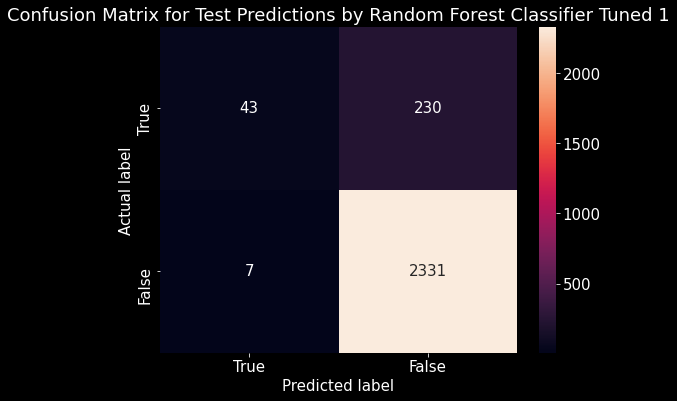

In [84]:
cm_rf_clf1 = confusion_matrix(test_y, test_predictions_df.rf_clf1_pred, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_rf_clf1, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by Random Forest Classifier Tuned 1')
    plt.savefig('plots/Confusion Matrix - Random Forest Tuned 1.png', bbox_inches='tight')
    plt.show()

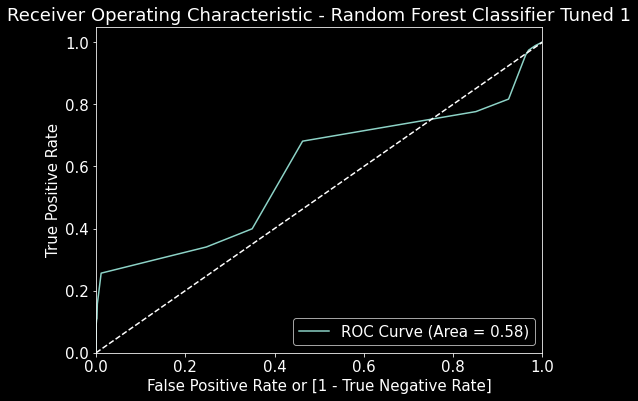

In [85]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.rf_clf1_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % rf_clf1_test_auc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Random Forest Classifier Tuned 1')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - Random Forest Tuned 1.png', bbox_inches='tight')
    plt.show()

#### Tune Model 2: For Best AUC

In [86]:
rfCV2 = GridSearchCV(RandomForestClassifier(random_state=12345), param_grid=rf_params, cv=5, verbose=10, n_jobs=-1, scoring='roc_auc')

rfCV2 .fit(train_x_os, train_y_os)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [5, 10, 15],
                         'n_estimators': [20, 50, 100, 150]},
             scoring='roc_auc', verbose=10)

In [87]:
print('Best Score :{} | Best Parameters :{}'.format(rfCV2.best_score_, rfCV2.best_params_))

Best Score :0.999508545613667 | Best Parameters :{'max_depth': 15, 'max_features': 5, 'n_estimators': 150}


In [88]:
cv_results_rf2 = pd.DataFrame(rfCV2.cv_results_)
cv_results_rf2 = cv_results_rf2.sort_values("mean_test_score", ascending=False)
cv_results_rf2[
    [
        "mean_test_score",
        "std_test_score",
        "param_n_estimators",
        "param_max_depth",
        "param_max_features"
    ]
].head(5)

,mean_test_score,std_test_score,param_n_estimators,param_max_depth,param_max_features
27,0.999509,0.000371,150,15,5
26,0.999392,0.000395,100,15,5
25,0.999169,0.000768,50,15,5
30,0.998848,0.000925,100,15,10
31,0.998820,0.000941,150,15,10


In [89]:
# Creating a new RF model using the Best Estimator
rf_clf2 = rfCV2.best_estimator_

rf_clf2.fit(train_x_os, train_y_os)

RandomForestClassifier(max_depth=15, max_features=5, n_estimators=150,
                       random_state=12345)

In [93]:
file = open('models/RandomForestTuned2.pkl', 'wb' )

pickle.dump(rf_clf2, file)

file.close()

In [160]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(rf_clf2.predict(train_x_os), name='rf_clf2_pred'), pd.Series(rf_clf2.predict_proba(train_x_os)[:,1], name='rf_clf2_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(rf_clf2.predict(test_x_scaled), name='rf_clf2_pred'), pd.Series(rf_clf2.predict_proba(test_x_scaled)[:,1],name='rf_clf2_proba')], axis=1)

In [91]:
rf_clf2_train_acc = accuracy_score(train_y_os, train_predictions_df.rf_clf2_pred)
rf_clf2_test_acc = accuracy_score(test_y, test_predictions_df.rf_clf2_pred)
rf_clf2_train_auc = roc_auc_score(train_y_os, train_predictions_df.rf_clf2_proba)
rf_clf2_test_auc = roc_auc_score(test_y, test_predictions_df.rf_clf2_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(rf_clf2_train_acc, rf_clf2_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(rf_clf2_train_auc, rf_clf2_test_auc ))

Training Accuracy :0.9937831413421101 | Testing Accuracy :0.9199540405974722
Training AUC :1.0 | Testing AUC :0.7025023735887722


In [92]:
print(classification_report(test_y, test_predictions_df.rf_clf2_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96      2338
        True       0.86      0.28      0.42       273

    accuracy                           0.92      2611
   macro avg       0.89      0.64      0.69      2611
weighted avg       0.92      0.92      0.90      2611



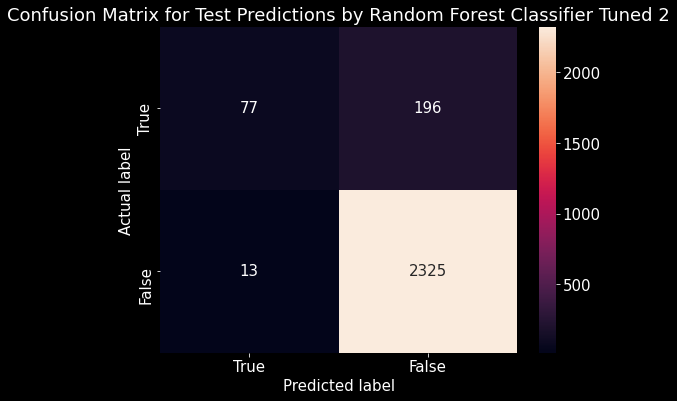

In [88]:
cm_rf_clf2 = confusion_matrix(test_y, test_predictions_df.rf_clf2_pred, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_rf_clf2, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by Random Forest Classifier Tuned 2')
    plt.savefig('plots/Confusion Matrix - Random Forest Tuned 2.png', bbox_inches='tight')
    plt.show()

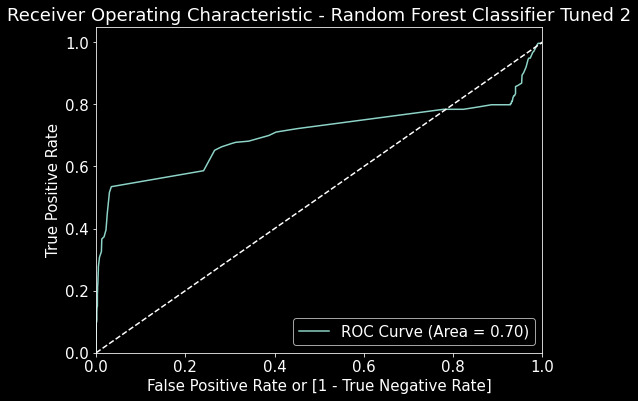

In [93]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.rf_clf2_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % rf_clf2_test_auc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Random Forest Classifier Tuned 2')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - Random Forest Tuned 2.png', bbox_inches='tight')
    plt.show()

## Gradient Boosting Classifier

In [94]:
gb_clf = GradientBoostingClassifier(random_state=12345)

gb_clf.fit(train_x_os, train_y_os)

GradientBoostingClassifier(random_state=12345)

In [95]:
file = open('models/GradientBoostingMachine.pkl', 'wb' )

pickle.dump(gb_clf, file)

file.close()

In [161]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(gb_clf.predict(train_x_os), name='gb_clf_pred'), pd.Series(gb_clf.predict_proba(train_x_os)[:,1], name='gb_clf_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(gb_clf.predict(test_x_scaled), name='gb_clf_pred'), pd.Series(gb_clf.predict_proba(test_x_scaled)[:,1],name='gb_clf_proba')], axis=1)

In [97]:
gb_clf_train_acc = accuracy_score(train_y_os, train_predictions_df.gb_clf_pred)
gb_clf_test_acc = accuracy_score(test_y, test_predictions_df.gb_clf_pred)
gb_clf_train_auc = roc_auc_score(train_y_os, train_predictions_df.gb_clf_proba)
gb_clf_test_auc = roc_auc_score(test_y, test_predictions_df.gb_clf_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(gb_clf_train_acc, gb_clf_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(gb_clf_train_auc, gb_clf_test_auc ))

Training Accuracy :0.9758639605046626 | Testing Accuracy :0.30333205668326313
Training AUC :0.991923911234789 | Testing AUC :0.7533943102805378


In [98]:
print(classification_report(test_y, test_predictions_df.gb_clf_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.92      0.24      0.39      2338
        True       0.11      0.81      0.20       273

    accuracy                           0.30      2611
   macro avg       0.51      0.53      0.29      2611
weighted avg       0.83      0.30      0.37      2611



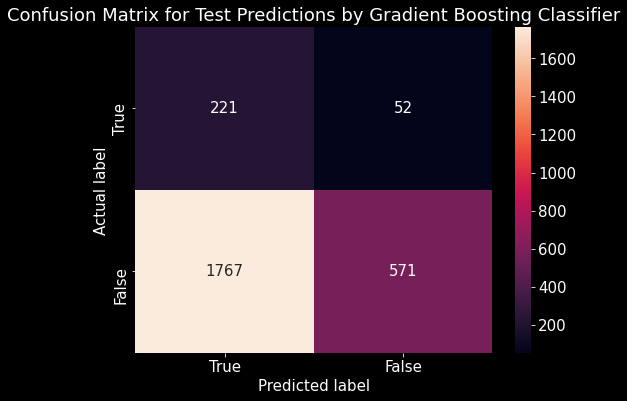

In [100]:
cm_gb_clf = confusion_matrix(test_y, test_predictions_df.gb_clf_pred, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_gb_clf, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by Gradient Boosting Classifier')
    plt.savefig('plots/Confusion Matrix - Gradient Boosting.png', bbox_inches='tight')
    plt.show()

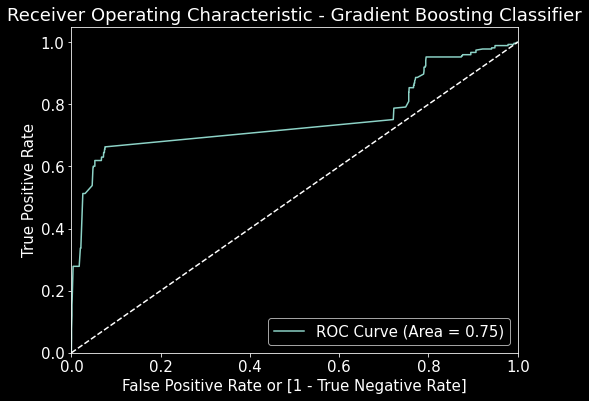

In [101]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.gb_clf_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % gb_clf_test_auc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Gradient Boosting Classifier')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - Gradient Boosting.png', bbox_inches='tight')
    plt.show()

### Tuning Gradient Boosting Classifier

In [102]:
gb_params ={
    'n_estimators': [20,50,100,150],
    'max_depth': [5,10,15],
    'max_features': [5,10,15],
    'learning_rate': [0.1,0.5,0.9]
}

In [103]:
gbCV1 = GridSearchCV(GradientBoostingClassifier(random_state=12345), param_grid=gb_params, cv=5, verbose=10, n_jobs=-1, scoring='accuracy')

gbCV1.fit(train_x_os, train_y_os)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.9],
                         'max_depth': [5, 10, 15], 'max_features': [5, 10, 15],
                         'n_estimators': [20, 50, 100, 150]},
             scoring='accuracy', verbose=10)

In [105]:
print('Best Score :{} | Best Parameters :{}'.format(gbCV1.best_score_, gbCV1.best_params_))

Best Score :0.9946971843760162 | Best Parameters :{'learning_rate': 0.9, 'max_depth': 15, 'max_features': 5, 'n_estimators': 150}


In [106]:
cv_results_gb1 = pd.DataFrame(gbCV1.cv_results_)
cv_results_gb1 = cv_results_gb1.sort_values("mean_test_score", ascending=False)
cv_results_gb1[
    [
        "mean_test_score",
        "std_test_score",
        "param_n_estimators",
        "param_max_depth",
        "param_max_features",
        "param_learning_rate"
    ]
].head(5)

,mean_test_score,std_test_score,param_n_estimators,param_max_depth,param_max_features,param_learning_rate
99,0.994697,0.000943,150,15,5,0.9
103,0.994240,0.001345,150,15,10,0.9
98,0.992869,0.000849,100,15,5,0.9
107,0.992412,0.001974,150,15,15,0.9
102,0.991954,0.001179,100,15,10,0.9


In [107]:
# Creating a new GB model using the Best Estimator
gb_clf1 = gbCV1.best_estimator_

gb_clf1.fit(train_x_os, train_y_os)

GradientBoostingClassifier(learning_rate=0.9, max_depth=15, max_features=5,
                           n_estimators=150, random_state=12345)

In [109]:
file = open('models/GradientBoostingMachineTuned1.pkl', 'wb' )

pickle.dump(gb_clf1, file)

file.close()

In [162]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(gb_clf1.predict(train_x_os), name='gb_clf1_pred'), pd.Series(gb_clf1.predict_proba(train_x_os)[:,1], name='gb_clf1_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(gb_clf1.predict(test_x_scaled), name='gb_clf1_pred'), pd.Series(gb_clf1.predict_proba(test_x_scaled)[:,1],name='gb_clf1_proba')], axis=1)

In [111]:
gb_clf1_train_acc = accuracy_score(train_y_os, train_predictions_df.gb_clf1_pred)
gb_clf1_test_acc = accuracy_score(test_y, test_predictions_df.gb_clf1_pred)
gb_clf1_train_auc = roc_auc_score(train_y_os, train_predictions_df.gb_clf1_proba)
gb_clf1_test_auc = roc_auc_score(test_y, test_predictions_df.gb_clf1_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(gb_clf1_train_acc, gb_clf1_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(gb_clf1_train_auc, gb_clf1_test_auc ))

Training Accuracy :1.0 | Testing Accuracy :0.8981233243967829
Training AUC :1.0 | Testing AUC :0.6621678150762839


In [112]:
print(classification_report(test_y, test_predictions_df.gb_clf1_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.90      1.00      0.95      2338
        True       0.89      0.03      0.06       273

    accuracy                           0.90      2611
   macro avg       0.89      0.51      0.50      2611
weighted avg       0.90      0.90      0.85      2611



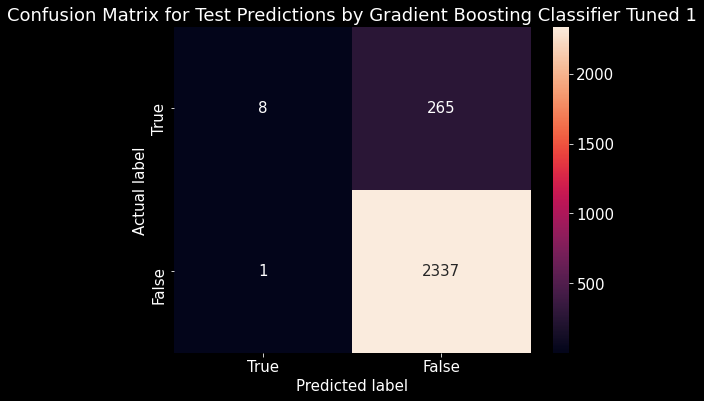

In [113]:
cm_gb_clf1 = confusion_matrix(test_y, test_predictions_df.gb_clf1_pred, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_gb_clf1, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by Gradient Boosting Classifier Tuned 1')
    plt.savefig('plots/Confusion Matrix - Gradient Boosting Tuned 1.png', bbox_inches='tight')
    plt.show()

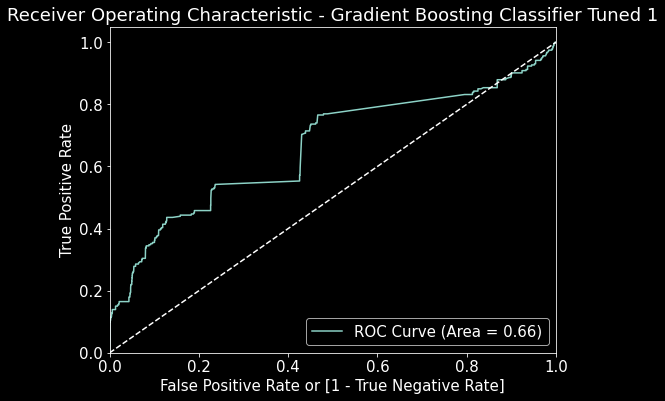

In [114]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.gb_clf1_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % gb_clf1_test_auc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Gradient Boosting Classifier Tuned 1')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - Gradient Boosting Tuned 1.png', bbox_inches='tight')
    plt.show()

## XGBoost Classifier

In [116]:
xgbc = XGBClassifier(random_state=12345)

xgbc.fit(train_x_os, train_y_os)

[00:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=12345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
file = open('models/XGBoostClassifier.pkl', 'wb' )

pickle.dump(xgbc, file)

file.close()

In [163]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(xgbc.predict(train_x_os), name='xgbc_pred'), pd.Series(xgbc.predict_proba(train_x_os)[:,1], name='xgbc_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(xgbc.predict(test_x_scaled), name='xgbc_pred'), pd.Series(xgbc.predict_proba(test_x_scaled)[:,1],name='xgbc_proba')], axis=1)

In [119]:
xgbc_train_acc = accuracy_score(train_y_os, train_predictions_df.xgbc_pred)
xgbc_test_acc = accuracy_score(test_y, test_predictions_df.xgbc_pred)
xgbc_train_auc = roc_auc_score(train_y_os, train_predictions_df.xgbc_proba)
xgbc_test_auc = roc_auc_score(test_y, test_predictions_df.xgbc_proba)
print('Training Accuracy :{} | Testing Accuracy :{}'.format(xgbc_train_acc, xgbc_test_acc))
print('Training AUC :{} | Testing AUC :{}'.format(xgbc_train_auc, xgbc_test_auc ))

Training Accuracy :0.9994514536478333 | Testing Accuracy :0.12638835695135964
Training AUC :1.0 | Testing AUC :0.32750981553376757


In [120]:
print(classification_report(test_y, test_predictions_df.xgbc_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       0.59      0.08      0.14      2338
        True       0.06      0.53      0.11       273

    accuracy                           0.13      2611
   macro avg       0.33      0.31      0.13      2611
weighted avg       0.54      0.13      0.14      2611



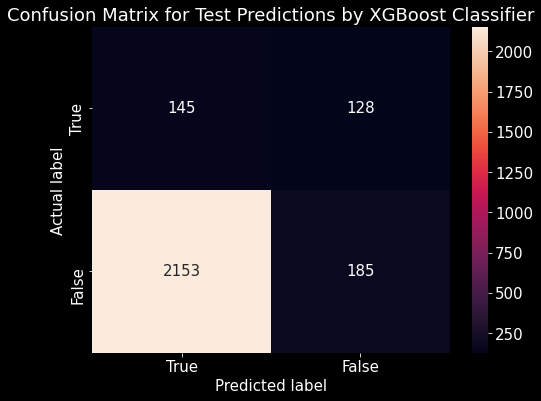

In [121]:
cm_xgbc = confusion_matrix(test_y, test_predictions_df.xgbc_pred, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_xgbc, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by XGBoost Classifier')
    plt.savefig('plots/Confusion Matrix - XGBoost Classifier.png', bbox_inches='tight')
    plt.show()

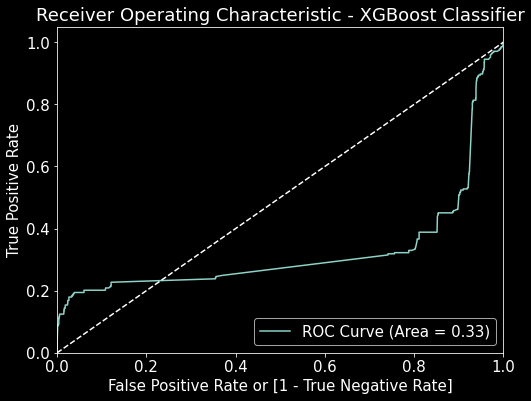

In [122]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.xgbc_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % xgbc_test_auc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - XGBoost Classifier')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - XGBoost Classifier.png', bbox_inches='tight')
    plt.show()

## Multi Layer Perceptron
### using Sequential Model with Dense Layers

In [123]:
# using Earlystopping rounds to avoid overfitting on training
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [124]:
# Instantiating the Model
mlp_clf = Sequential()

In [125]:
print('Input Dimensions should be :',train_x_os.shape[1])
print('Maximum Number of Nodes per Layer Should be around :',2/3*train_x_os.shape[1] + train_y_os.nunique()-1)
print('Nodes for the output layer should be around :',train_y_os.nunique()-1)

Input Dimensions should be : 15
Maximum Number of Nodes per Layer Should be around : 11.0
Nodes for the output layer should be around : 1


In [126]:
# Adding the Input Layer and the First Hidden Layer
mlp_clf.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'softmax', input_dim = 15))

# Adding the Second Hidden Layer
mlp_clf.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'softmax'))

# Adding the Third Hidden Layer
mlp_clf.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))

# Adding the Output Layer
mlp_clf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [127]:
# Compiling Neural Network
mlp_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', weighted_metrics = ['accuracy'])

In [128]:
# Fitting our Model 
mlp_clf.fit(train_x_os, train_y_os, batch_size = 10, epochs = 100, callbacks=callback, validation_data=(test_x_scaled, test_y))

Epoch 1/100
1094/1094 [==============================] - 5s 3ms/step - loss: 0.6636 - accuracy: 0.6685 - val_loss: 0.6994 - val_accuracy: 0.2823
Epoch 2/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.4884 - accuracy: 0.8342 - val_loss: 0.6189 - val_accuracy: 0.8108
Epoch 3/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4333 - accuracy: 0.8343 - val_loss: 0.5922 - val_accuracy: 0.8093
Epoch 4/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.4183 - accuracy: 0.8363 - val_loss: 0.5205 - val_accuracy: 0.8767
Epoch 5/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.4116 - accuracy: 0.8376 - val_loss: 0.4980 - val_accuracy: 0.8843
Epoch 6/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.4075 - accuracy: 0.8374 - val_loss: 0.4899 - val_accuracy: 0.8843
Epoch 7/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.4043 - accuracy: 0.8405 - val_loss: 0.4696 - val_ac

In [130]:
file = open('models/MplClassifier.pkl', 'wb' )

pickle.dump(mlp_clf, file)

file.close()

INFO:tensorflow:Assets written to: ram://9c8213fd-1023-4a7b-82d1-cf3cf70c5714/assets


In [168]:
mlp_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 96        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [164]:
train_predictions_df = pd.concat([train_predictions_df, pd.Series(mlp_clf.predict(train_x_os)[:,0], name='mlp_clf_proba')], axis=1)
test_predictions_df = pd.concat([test_predictions_df, pd.Series(mlp_clf.predict(test_x_scaled)[:,0],name='mlp_clf_proba')], axis=1)

In [147]:
mlp_clf_train_auc = roc_auc_score(train_y_os, train_predictions_df.mlp_clf_proba)
mlp_clf_test_auc = roc_auc_score(test_y, test_predictions_df.mlp_clf_proba)

mlp_clf_train_acc = accuracy_score(train_y_os, train_predictions_df.mlp_clf_proba>0.5)
mlp_clf_test_acc = accuracy_score(test_y, test_predictions_df.mlp_clf_proba>0.5)

print('Training AUC :{} | Testing AUC :{}'.format(mlp_clf_train_auc, mlp_clf_test_auc))
print('Training Accuracy :{} | Testing Accuracy :{}'.format((mlp_clf_train_acc), (mlp_clf_test_acc)))

Training AUC :0.9717566499000115 | Testing AUC :0.7463307294359476
Training Accuracy :0.9261290912415432 | Testing Accuracy :0.8835695135963233


In [149]:
print(classification_report(test_y, test_predictions_df.mlp_clf_proba>0.5, target_names=target_names))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2338
        True       0.42      0.32      0.36       273

    accuracy                           0.88      2611
   macro avg       0.67      0.63      0.65      2611
weighted avg       0.87      0.88      0.88      2611



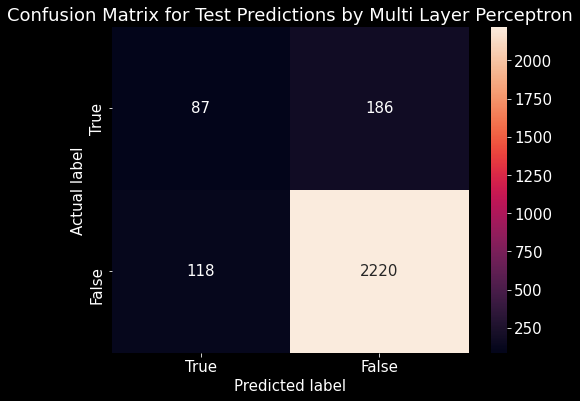

In [150]:
cm_mlp_clf = confusion_matrix(test_y, test_predictions_df.mlp_clf_proba>0.5, labels=[True,False])
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_mlp_clf, annot=True,  fmt='d', xticklabels = ["True", "False"] , yticklabels = ["True", "False"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Test Predictions by Multi Layer Perceptron')
    plt.savefig('plots/Confusion Matrix - Multi Layer Perceptron.png', bbox_inches='tight')
    plt.show()

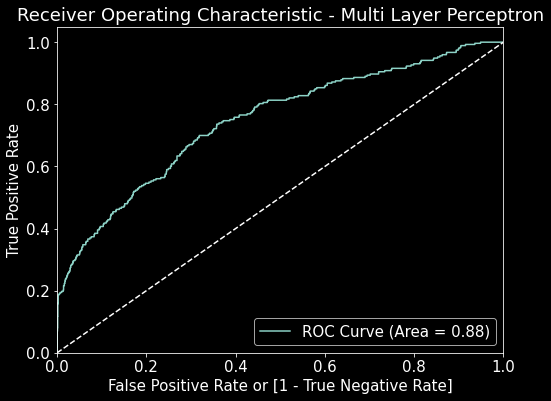

In [151]:
fpr, tpr, thresholds = roc_curve(test_y, test_predictions_df.mlp_clf_proba, drop_intermediate = False )
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % mlp_clf_test_acc)
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Multi Layer Perceptron')
    plt.legend(loc="lower right")
    plt.savefig('plots/ROC Curve - Multi Layer Perceptron.png', bbox_inches='tight')
    plt.show()

## Choosing the Best Model

In [165]:
train_predictions_df.head()

,log_reg_pred,log_reg_proba,lsvc_pred,lsvc_proba,rf_clf_pred,rf_clf_proba,rf_clf1_pred,rf_clf1_proba,rf_clf2_pred,rf_clf2_proba,gb_clf_pred,gb_clf_proba,gb_clf1_pred,gb_clf1_proba,xgbc_pred,xgbc_proba,mlp_clf_proba
0,False,0.169124,False,0.097648,False,0.00,False,0.000000,False,0.006667,False,0.015951,False,3.572034e-59,False,0.000015,0.014947
1,False,0.076764,False,0.062516,False,0.00,False,0.000000,False,0.000000,False,0.007510,False,2.922930e-59,False,0.000086,0.014831
2,True,0.525438,False,0.452142,False,0.25,False,0.343027,False,0.275826,True,0.524712,False,2.711487e-56,False,0.071386,0.818258
3,False,0.471750,True,0.516739,False,0.00,False,0.000000,False,0.000000,False,0.010737,False,1.099419e-57,False,0.000195,0.014883
4,True,0.986558,True,0.990351,False,0.42,True,0.687663,True,0.723970,True,0.969024,False,7.583342e-47,True,0.519942,0.960769


In [166]:
test_predictions_df.head()

,log_reg_pred,log_reg_proba,lsvc_pred,lsvc_proba,rf_clf_pred,rf_clf_proba,rf_clf1_pred,rf_clf1_proba,rf_clf2_pred,rf_clf2_proba,gb_clf_pred,gb_clf_proba,gb_clf1_pred,gb_clf1_proba,xgbc_pred,xgbc_proba,mlp_clf_proba
0,False,0.005361,False,0.000471,False,0.29,False,0.30,False,0.346667,True,0.533367,False,2.755192e-39,True,0.782345,0.015806
1,False,0.007964,False,0.000855,False,0.34,False,0.30,False,0.386667,True,0.533367,False,4.099652e-38,True,0.816307,0.017082
2,False,0.010865,False,0.000778,False,0.34,False,0.30,False,0.386667,True,0.533367,False,4.099652e-38,True,0.816307,0.016829
3,False,0.251215,False,0.000154,False,0.36,False,0.30,False,0.426667,True,0.762415,False,3.690389e-36,True,0.767500,0.093405
4,False,0.324433,False,0.000151,False,0.33,False,0.35,False,0.440000,True,0.689122,False,1.008343e-37,True,0.730173,0.169409


In [154]:
pd.DataFrame({
    'Accuracy':[logreg_test_acc, lsvc_test_acc, rf_clf_test_acc, rf_clf1_test_acc, rf_clf2_test_acc, gb_clf_test_acc, gb_clf1_test_acc, xgbc_test_acc, mlp_clf_test_acc],
    'AUC':[logreg_test_auc, lsvc_test_auc, rf_clf_test_auc, rf_clf1_test_auc, rf_clf2_test_auc, gb_clf_test_auc, gb_clf1_test_auc, xgbc_test_auc, mlp_clf_test_auc]
}, index=['Logistic Regression', 'LinearSVC', 'Random Forest', 'Random Forest Tuned 1', 'Random Forest Tuned 2', 'Gradient Boosting', 'Gradient Boosting Tuned 1', 'XGBoost', 'MLP'])

,Accuracy,AUC
Logistic Regression,0.871314,0.575939
LinearSVC,0.895059,0.670720
Random Forest,0.907698,0.598625
Random Forest Tuned 1,0.909230,0.583626
Random Forest Tuned 2,0.919954,0.702502
Gradient Boosting,0.303332,0.753394
Gradient Boosting Tuned 1,0.898123,0.662168
XGBoost,0.126388,0.327510
MLP,0.883570,0.746331


The 2nd Tune Model of Random Forest Classifier seems to be performing well both Accuracy and AUC wise. so we will be finalizing it as our Final Model for Predictions

In [100]:
age = None

In [102]:
if age:
    print('T')
else:
    print('false')

false


In [108]:
train_x.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
8547,90.0,1.94,0.63,1.20,57.0,75.0,0,0,0,0,0,1,0,0,0
8571,97.0,2.50,0.98,1.10,95.0,65.0,0,0,0,0,1,1,0,0,0
4757,200.0,2.60,1.01,0.02,203.0,42.0,0,0,0,0,0,0,0,0,0
6323,156.0,0.40,0.68,4.30,106.0,81.0,0,0,0,0,0,0,0,0,0
1412,82.0,1.94,0.82,16.00,67.0,58.0,0,0,0,0,0,0,0,0,0


In [52]:
FTI, T3, T4U, TSH, TT4, age, goitre, hypopituitary, lithium, pregnant, psych, sex, sick, thyroid_surgery, tumor = 90.0, 1.94, 0.63, 1.2, 57.0, 75.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0

In [59]:
scaler_transformer.transform([[FTI, T3, T4U, TSH, TT4, age, goitre, hypopituitary, lithium, pregnant, psych, sex, sick, thyroid_surgery, tumor]])

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [125]:
[[FTI, T3, T4U, TSH, TT4, age, goitre, hypopituitary, lithium, pregnant, psych, sex, sick, thyroid_surgery, tumor]]

[[90.0,
  1.94,
  0.63,
  1.2,
  57.0,
  75.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0]]

In [53]:
temp_dict ={
    'FTI':90.0,
    'T3':1.94,
    'T4U':0.63,
    'TSH':1.2,
    'TT4':57.0,
    'age':75.0,
    'goitre':0.0,
    'hypopituitary':0.0,
    'lithium':0.0,
    'pregnant':0.0,
    'psych':0.0,
    'sex':1.0,
    'sick':0.0,
    'thyroid_surgery':0.0,
    'tumor':0.0
}

In [54]:
temp_df = pd.DataFrame(columns=temp_dict.keys(), index = [0])

In [55]:
for var in temp_dict.keys():
    temp_df.loc[0,[var]] = temp_dict[var]
temp_df

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
0,90.0,1.94,0.63,1.2,57.0,75.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
temp_df = pd.DataFrame(scaler.transform(temp_df), columns=temp_df.columns)

In [63]:
log_reg.predict(temp_df)[0]

True

In [72]:
train_x_scaled.head(1)

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
0,-0.675459,0.00031,-1.84023,-0.237613,-1.463851,1.197936,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
a = True

In [73]:
if a:
    print('T')
else:
    print('F')

T


In [86]:
test_x

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
5700,131.0,1.50,1.05,0.32,138.0,50.0,0,0,0,0,0,0,1,0,0
15,106.0,1.94,1.07,0.40,113.0,77.0,0,0,0,0,0,0,0,0,0
3928,144.0,1.94,1.05,1.40,151.0,22.0,0,0,0,0,0,0,0,0,0
7375,71.0,1.94,0.80,4.80,57.0,42.0,0,0,0,0,0,0,0,0,0
4699,90.0,1.94,0.78,7.00,71.0,83.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,101.0,1.50,0.84,4.00,85.0,72.0,0,0,0,0,0,0,0,0,0
6569,128.0,2.40,0.72,0.47,92.0,64.0,0,0,0,0,0,0,0,0,1
5747,93.0,2.30,0.94,2.20,87.0,60.0,0,0,0,0,0,1,0,0,0
4075,152.0,1.94,0.83,0.02,126.0,49.0,0,0,0,0,0,1,0,1,0


In [87]:
test_y

5700    False
15      False
3928    False
7375    False
4699     True
        ...  
861     False
6569    False
5747    False
4075    False
7998    False
Name: thyroid_disease, Length: 2611, dtype: bool